## This is Markdown

In [6]:
print('This is Python')

This is Python


### So basically...

A Jupyter notebook can:

>Use text to explain your data

>Explain data points, outliers, and other factors right next to the displayed data

>Format a presentaion for the fidnings of analyzed data.

## Using python to display data:

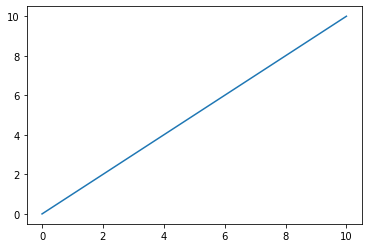

In [7]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,1,2,3,4,5,6,7,8,9,10]

plt.plot(x, y)
plt.show()

# Let's Try a Real Example

### First, we are going to import some dependancies that we will be using for this visual:

In [8]:
import requests
import pandas as pd

Now, we are going to conenct to a free API in order to display historical price data for two major crypto-curriencies in the past seven days.

In [9]:
def get_historic_price(symbol, exchange='bitfinex', after='2022-07-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    },)
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Now we can pull the data

In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-07-04 07:28:19.922785')

In [11]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [12]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin:

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-04 08:00:00,19068.65,19125.33,19061.24,19104.22,16.835378,3.214074e+05
2022-07-04 09:00:00,19107.22,19149.77,19092.77,19124.60,16.142345,3.086748e+05
2022-07-04 10:00:00,19121.95,19411.83,19115.95,19342.35,89.668752,1.728346e+06
2022-07-04 11:00:00,19354.35,19521.00,19354.35,19455.97,112.978221,2.196874e+06
2022-07-04 12:00:00,19456.20,19809.37,19438.05,19787.85,185.726377,3.645431e+06


<AxesSubplot:xlabel='CloseTime'>

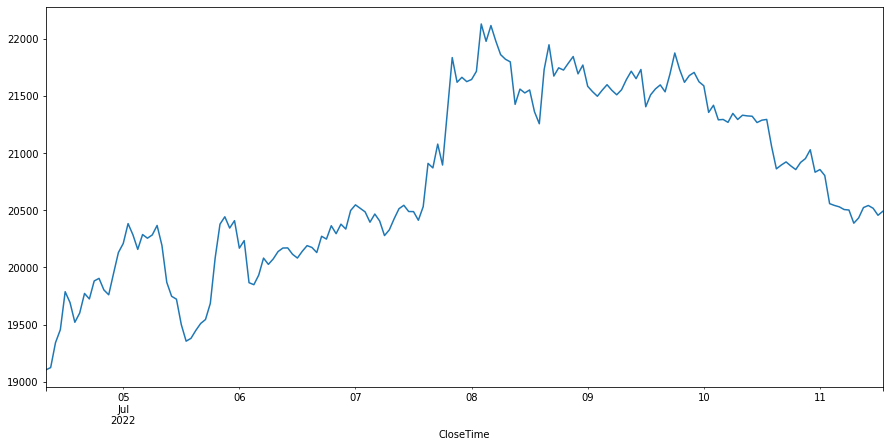

In [14]:
btc['ClosePrice'].plot(figsize=(15,7))

In [15]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,20755.481207,20866.324713,20650.324828,20763.675575,93.417660,1.943638e+06
std,772.255980,767.181911,760.424396,760.220930,120.839060,2.575825e+06
min,19068.650000,19125.330000,19061.240000,19104.220000,8.835558,1.839543e+05
25%,20181.515000,20303.040000,20097.567500,20191.182500,26.189360,5.446668e+05
50%,20537.260000,20630.385000,20477.710000,20542.015000,56.913477,1.192663e+06
75%,21540.637500,21622.017500,21430.700000,21536.847500,108.901765,2.183770e+06
max,22142.710000,22401.000000,21952.540000,22128.970000,1035.380949,2.233666e+07


### Ethereum

In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-07-04 08:00:00,1045.66,1050.92,1045.17,1049.53,214.865198,225153.824507
2022-07-04 09:00:00,1049.27,1052.72,1048.81,1049.78,335.804926,352942.028155
2022-07-04 10:00:00,1049.78,1071.02,1049.10,1067.57,495.762802,523730.903809
2022-07-04 11:00:00,1068.75,1078.29,1067.38,1074.01,251.815281,270025.732212
2022-07-04 12:00:00,1074.18,1104.46,1070.73,1099.09,869.620903,947607.969036


<AxesSubplot:xlabel='CloseTime'>

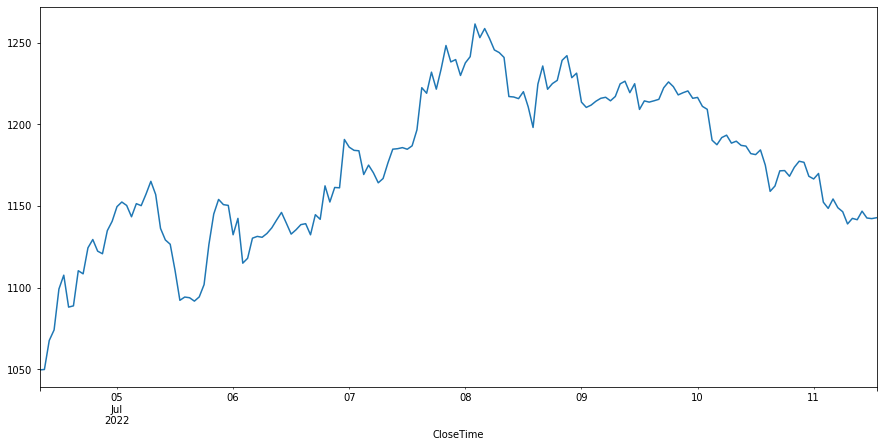

In [17]:
eth['ClosePrice'].plot(figsize=(15,7))

In [18]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,174.00000,174.000000,174.000000,174.000000,174.000000,1.740000e+02
mean,1173.39408,1181.124713,1166.286437,1173.910747,679.937532,7.945946e+05
std,47.33585,46.355789,46.928324,46.279889,1210.572689,1.404447e+06
min,1045.66000,1050.920000,1045.170000,1049.530000,35.752000,4.346891e+04
25%,1140.64000,1148.102500,1132.990000,1141.622500,162.498599,1.889279e+05
50%,1172.81000,1176.455000,1165.485000,1172.680000,295.951357,3.518929e+05
75%,1215.96000,1221.162500,1211.287500,1215.970000,666.247485,7.925832e+05
max,1262.21000,1275.040000,1252.260000,1261.500000,10209.049686,1.185464e+07


## Dynamic plots with Bokeh

#### We can use a different library to create dynamic and interactive graphs, better suited for analyzing your visualized data.

First, let's import:

In [19]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [20]:
output_notebook()

Loading BokehJS ...

And now we can generate the plot:

In [21]:
p1 = figure(x_axis_type='datetime', title='Crypto Prices', width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label= 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')

p1.legend.location = 'top_left'

show(p1)

**While Bokeh is a cool tool, matplotlib still has significantly more tools available for use, and is often still the go to.**

## Excel

#### We can also export this data to an excel spreadsheet to easily store, send, and view the compiled or re-formatted data

In [22]:
writer = pd.ExcelWriter('cryptos.xlsx')

We first iniitialize an Excel writer from pandas, as shown above. Then, we can write our data as such:

In [23]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [24]:
eth.to_excel(writer, sheet_name='Ethereum')

And then we can save the file:

In [25]:
writer.save()